## Libraries and settings

In [9]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

# Show version of scikit-learn
import sklearn
sklearn.__version__

/workspaces/DataAnalyticsLN/Classification as Modelling Method


'1.6.0'

## Import data

In [10]:
#Read and select variables
df_refugees_orig = pd.read_csv("refugee_data_and_gdp.csv",sep=',',encoding="utf-8")

#Number of rows and columns
print(df_refugees_orig.shape)

#first 5 rows
df_refugees_orig.head(100)

(2160, 7)


,year,country_name,gdp,total_refugees,coo_name,total,male_female_ratio
0,2001,France,1.370377e+12,6036.0,Afghanistan,1284.0,1.221453
1,2001,France,1.370377e+12,6036.0,Syrian Arab Rep.,192.0,2.918367
2,2001,France,1.370377e+12,6036.0,Iran (Islamic Rep. of),1987.0,1.806497
3,2001,France,1.370377e+12,6036.0,Iraq,1629.0,1.291139
4,2001,France,1.370377e+12,6036.0,Ukraine,407.0,1.014851
...,...,...,...,...,...,...,...
95,2002,France,1.492428e+12,5947.0,Nigeria,181.0,2.232143
96,2002,Germany,2.102351e+12,277159.0,Afghanistan,64363.0,NaN
97,2002,Germany,2.102351e+12,277159.0,Syrian Arab Rep.,15677.0,NaN
98,2002,Germany,2.102351e+12,277159.0,Iran (Islamic Rep. of),54000.0,NaN


### Variable description

### Count and remove missing values

In [11]:
# Count missing values
print(df_refugees_orig.isna().sum())
#remove rows with missing values
df_refugees_orig = df_refugees_orig.dropna()


# Fill numeric columns with their mean
# df_refugees_orig['male_female_ratio'] = df_refugees_orig['male_female_ratio'].fillna(df_refugees_orig['male_female_ratio'].mean())

# Fill non-numeric columns with a placeholder (e.g., "Unknown")
# non_numeric_columns = df_refugees_orig.select_dtypes(exclude=['number']).columns
# df_refugees_orig['coo_name'] = df_refugees_orig['coo_name'].fillna("Unknown")



year                    0
country_name            0
gdp                     0
total_refugees          0
coo_name               46
total                  46
male_female_ratio    1277
dtype: int64


### Transform nominal variable to matrix with 0/1 values - THIS IS SOMEHOW WRONG

In [12]:
# Categorize total_refugees into Low, Medium, High
bins = [0, 5000, 20000, float('inf')]
labels = ['Low', 'Medium', 'High']
df_refugees_orig['refugee_category'] = pd.cut(df_refugees_orig['total_refugees'], bins=bins, labels=labels)

# transform ordinal column into numeric
df_refugees_orig['refugee_category'] = df_refugees_orig['refugee_category'].cat


In [13]:
# Select features and encode nominal variables
features = ['gdp', 'year']  # Add more features as needed
df_encoded = pd.get_dummies(df_refugees_orig, columns=['country_name', 'coo_name'], drop_first=True)

# Define predictors (X) and target variable (y)
X = df_encoded[features]
y = df_encoded['refugee_category']
y = pd.Categorical(y).codes



In [14]:
# Check the type and dtype
print(type(y))  # Should show <class 'numpy.ndarray'>
print(y.dtype)  # Should show the data type, e.g., int64



<class 'numpy.ndarray'>
int8


## Classification Tree

### Create train and test samples (train 80%, test 20% of the data)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### Fit the classification tree model and make predictions

In [16]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=7)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int8)

### Show confusion matrix and classification report

In [17]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred), '\n')

# Classification report
print('Classification report')
print(classification_report(y_test, y_pred))

Confusion matrix
[[177]] 

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



### Print text representation of the classification tree

In [18]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- class: 0



### Visualize the classification tree

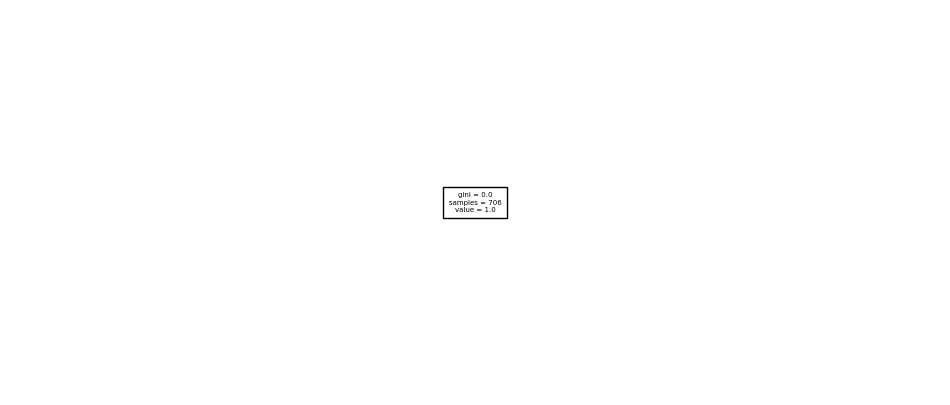

In [19]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(12,5))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['Low', 'Medium', 'High'],
                   filled=True,
                   fontsize=5,
                   label='root')

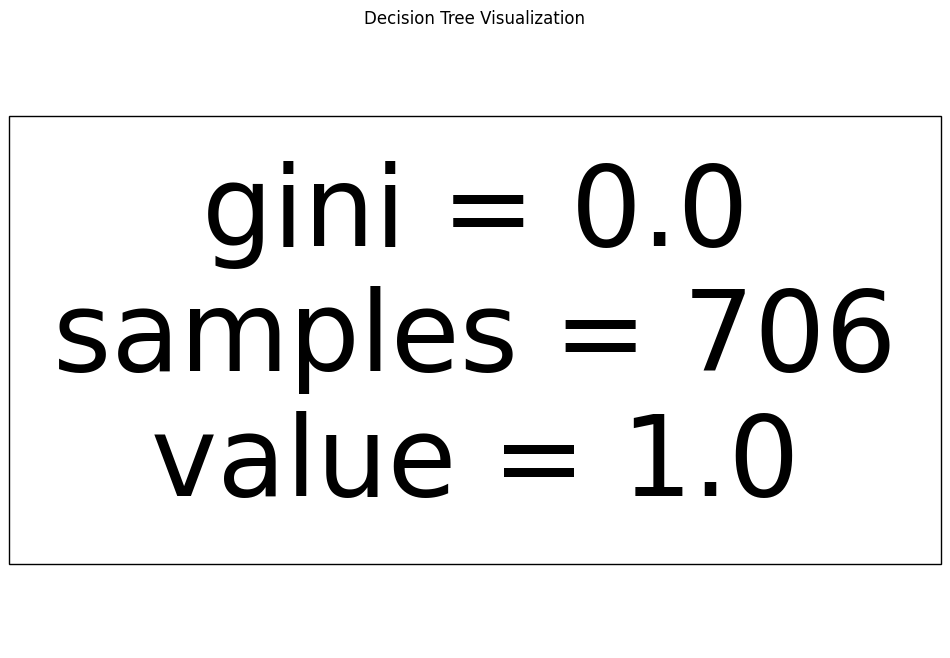

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


## Random Forest Classifier

### Create train and test samples (train 80%, test 20% of the data)

In [21]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(
    df_encoded[['refugee_category']],
    df_encoded['gdp'],
    test_size=0.20,
    random_state=42
)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())


X2_train:
                                       refugee_category
1762  <pandas.core.arrays.categorical.CategoricalAcc...
1364  <pandas.core.arrays.categorical.CategoricalAcc...
1119  <pandas.core.arrays.categorical.CategoricalAcc...
1114  <pandas.core.arrays.categorical.CategoricalAcc...
284   <pandas.core.arrays.categorical.CategoricalAcc... 

y2_train:
1762    0.000000e+00
1364    6.941182e+11
1119    3.808086e+12
1114    3.808086e+12
284     2.349796e+11
Name: gdp, dtype: float64


### Fit the Random Forest Classifier

In [22]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=20, max_depth=10)

# Train the random forest classifier
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable (gdp))
y_pred_rf = rfc.predict(X2_test)

print('Predicted target variable (gdp)')
y_pred_rf

TypeError: float() argument must be a string or a real number, not 'CategoricalAccessor'

### Show confusion matrix and classification report

### Show feature importance

### ROC curve and AUC